In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score,recall_score,f1_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [2]:
#Loading the NPZ file
data = np.load('C:/Users/zerox/Desktop/ML20019229/Datasets/pneumoniamnist.npz')
#print(data.keys()) #Get keys of the dataset

#split data
X_train,X_val,X_test = data['train_images'],data['val_images'],data['test_images']
y_train,y_val,y_test = data['train_labels'].flatten(),data['val_labels'].flatten(),data['test_labels'].flatten()

In [3]:
# Generate Digital labels
digital_label = {0: 'Normal', 1: 'Pneumonia'}

# Define a vectorizing function
vectorized_label_converter = np.vectorize(lambda x: digital_label.get(x))

# Vectorizing the label arrays
y_train_label = vectorized_label_converter(y_train)
y_val_label = vectorized_label_converter(y_val)
y_test_label = vectorized_label_converter(y_test)

Randomly Picked Train Images:


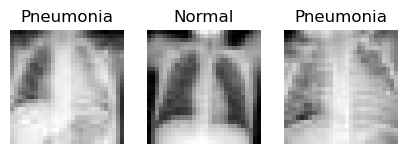

Randomly Picked Test Images:


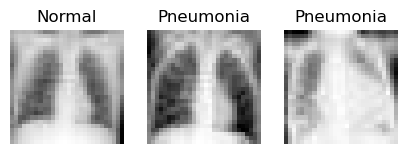

In [4]:
#Function to plot 6 randomly picked images with labels
def class_each_image(images,label,num=3):
    selection = np.random.choice(len(images),size=num,replace=False)
    #Create a 2*3 subplotted figure
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(5,2))
    axes = axes.flatten()
    
    #Display each image (6 images in total)
    for i, index in enumerate(selection):
        axes[i].imshow(images[index], cmap='grey')
        axes[i].set_title(f"{label[index]}")
        axes[i].axis('off')
    plt.show()

#print the label and image of train_image
print('Randomly Picked Train Images:')
class_each_image(X_train, y_train_label)
#print the label and imgge of test_image
print('Randomly Picked Test Images:')
class_each_image(X_test, y_test_label)
    

In [5]:
def resize_images(images, new_size=(128,128)):
    resized_images = []
    for idx in images:
        resized = cv2.resize(idx, new_size)
        resized_images.append(resized)
    return resized_images

In [6]:
def convert_to_rgb(images):
    converted_images = []
    for idx in images:
        if idx.shape[-1] == 3:
            converted_images.append(idx)
        else:
            converted_idx = np.stack([idx]*3, axis = -1)
            converted_images.append(converted_idx)
    return converted_images

In [7]:
def normalize_images(images):
    normalized_images = []
    for idx in images:
        idx = idx.astype('float32')
        idx /= 255.0
        normalized_images.append(idx)
    return normalized_images

In [8]:
X_train_preprocessed =  normalize_images(convert_to_rgb(resize_images(X_train,(128,128))))
X_val_preprocessed = normalize_images(convert_to_rgb(resize_images(X_val,(128,128))))
X_test_preprocessed = normalize_images(convert_to_rgb(resize_images(X_test,(128,128))))
#np.array(X_train_preprocessed).shape

In [9]:
# Assuming X_train_preprocessed, X_val_preprocessed, X_test_preprocessed are already defined
# Convert preprocessed data to numpy arrays (if they aren't already)
X_train_preprocessed = np.array(X_train_preprocessed)
X_val_preprocessed = np.array(X_val_preprocessed)
X_test_preprocessed = np.array(X_test_preprocessed)


# Ensure the labels are in the correct shape
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [10]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),  # Dropout layer added
    layers.Dense(2, activation='softmax')
])

In [11]:
# Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=3,
    restore_best_weights=True
)

In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(X_train_preprocessed, y_train, epochs=15, batch_size = 64, 
                    validation_data=(X_val_preprocessed, y_val),
                    callbacks=[early_stopping])

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test)

Epoch 1/15
74/74 [==============================] - 18s 237ms/step - loss: 0.4032 - accuracy: 0.8156 - val_loss: 0.2545 - val_accuracy: 0.9160
Epoch 2/15
74/74 [==============================] - 17s 231ms/step - loss: 0.2552 - accuracy: 0.9102 - val_loss: 0.1957 - val_accuracy: 0.9256
Epoch 3/15
74/74 [==============================] - 16s 222ms/step - loss: 0.2030 - accuracy: 0.9261 - val_loss: 0.1929 - val_accuracy: 0.9313
Epoch 4/15
74/74 [==============================] - 17s 228ms/step - loss: 0.1791 - accuracy: 0.9354 - val_loss: 0.1803 - val_accuracy: 0.9351
Epoch 5/15
74/74 [==============================] - 17s 228ms/step - loss: 0.1631 - accuracy: 0.9395 - val_loss: 0.1465 - val_accuracy: 0.9351
Epoch 6/15
74/74 [==============================] - 18s 237ms/step - loss: 0.1711 - accuracy: 0.9346 - val_loss: 0.1576 - val_accuracy: 0.9389
Epoch 7/15
74/74 [==============================] - 17s 231ms/step - loss: 0.1457 - accuracy: 0.9437 - val_loss: 0.1338 - val_accuracy: 0.9523

Training Accuracy: 0.9689889550209045
Validation Accuracy: 0.9580152630805969
Test Accuracy: 0.8605769276618958
Hyperparameters:
Number of Epochs: 15
Optimizer: Adam
Loss Function: binary Crossentropy


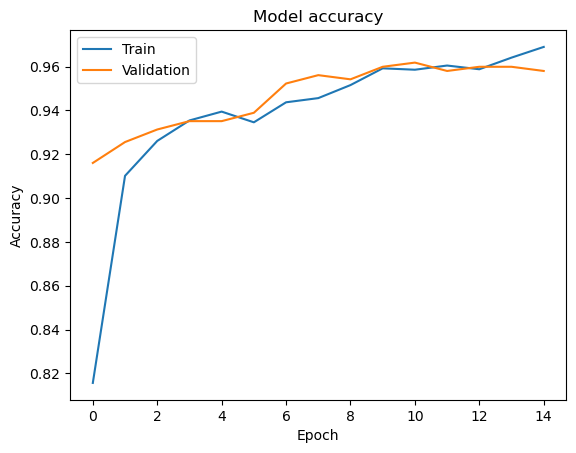

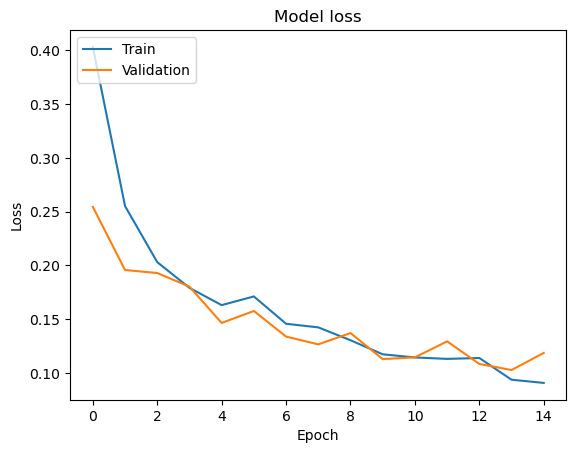

In [13]:
# Report training, validation and testing accuracy
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Test Accuracy: {test_accuracy}")

# Report hyperparameters
print("Hyperparameters:")
print(f"Number of Epochs: 15")
print(f"Optimizer: Adam")
print(f"Loss Function: binary Crossentropy")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [14]:
model.save('PneumoniaMNIST.h5')

In [18]:
predictions = model.predict(X_test_preprocessed)

# Convert predictions to label indices
predicted_labels = np.argmax(predictions, axis=1)

# Convert y_test back to label indices if it's in categorical format
true_labels = np.argmax(y_test, axis=1)

# Calculate the accuracy
accuracy = np.mean(predicted_labels == true_labels)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

# Optional: Display some predictions with their true labels
for i in range(10):  # Display first 10 comparisons
    predicted_str = vectorized_label_converter(predicted_labels[i])
    true_str = vectorized_label_converter(true_labels[i])
    print(f"Test image {i}: Predicted label - {predicted_str}, True label - {true_str}")

20/20 [==============================] - 1s 56ms/step
Accuracy on test set: 86.06%
Test image 0: Predicted label - Pneumonia, True label - Pneumonia
Test image 1: Predicted label - Pneumonia, True label - Normal
Test image 2: Predicted label - Pneumonia, True label - Pneumonia
Test image 3: Predicted label - Normal, True label - Normal
Test image 4: Predicted label - Pneumonia, True label - Pneumonia
Test image 5: Predicted label - Pneumonia, True label - Pneumonia
Test image 6: Predicted label - Pneumonia, True label - Pneumonia
Test image 7: Predicted label - Pneumonia, True label - Pneumonia
Test image 8: Predicted label - Pneumonia, True label - Pneumonia
Test image 9: Predicted label - Pneumonia, True label - Normal


In [20]:
from sklearn.metrics import classification_report

# Convert y_test back to label indices if it's in categorical format
true_labels = np.argmax(y_test, axis=1)

# Use the predicted_labels from the previous steps

# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=['Normal', 'Pneumonia'])

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      Normal       0.96      0.65      0.78       234
   Pneumonia       0.83      0.98      0.90       390

    accuracy                           0.86       624
   macro avg       0.89      0.82      0.84       624
weighted avg       0.88      0.86      0.85       624



Raw Confusion Matrix:
[[153  81]
 [  6 384]]


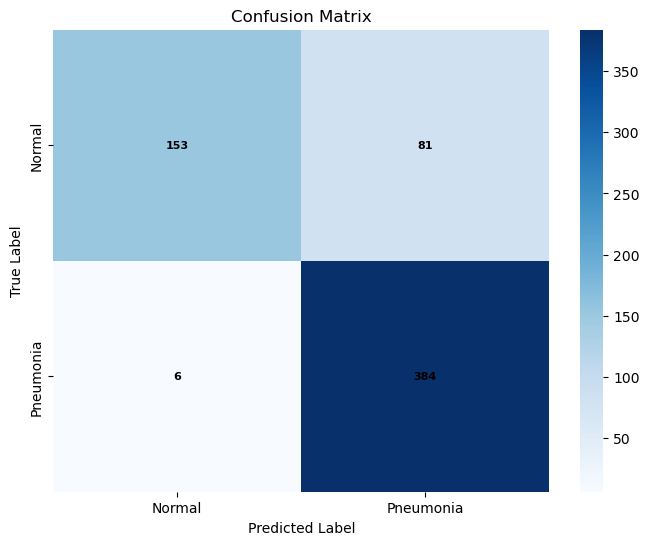

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming true_labels and predicted_labels are already defined
cm = confusion_matrix(true_labels, predicted_labels)

# Print the raw confusion matrix to check the values
print("Raw Confusion Matrix:")
print(cm)

# Convert confusion matrix to logarithmic scale to handle wide value ranges
cm_log_scale = np.log1p(cm)  # log1p is used to handle zero values in the matrix

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm
            , fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
# Annotate each cell with the actual values from 'cm'
for i in range(cm_log_scale.shape[0]):
    for j in range(cm_log_scale.shape[1]):
        plt.text(j+0.5, i+0.5, cm[i, j], 
                 fontdict={'fontsize':8, 'weight':'bold', 'color':'black'},
                 ha='center', va='center')

plt.show()